In [25]:
#Importing data & exploration

In [26]:
# Basic set-up
import os
import numpy as np
import pandas as pd
# ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

In [27]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [28]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [29]:
display(fake.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [30]:
display(real.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [31]:
display(fake.info())
print('\n')
display(real.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [32]:
display(fake.subject.value_counts())
print('\n')
display(real.subject.value_counts())


News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [33]:
fake['label'] = 'fake'
real['label'] = 'real'

In [34]:
data = pd.concat([fake, real], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)


,title,text,date,label
0,FOX NEWS BOMBSHELL REPORT: Trump Transition Te...,"On Friday, Democrats were doing their best to ...","Dec 16, 2017",fake
1,Myanmar police to free journalists working for...,(Reuters) - Myanmar police said on Tuesday the...,"December 26, 2017",real
2,BOOM! LIBERAL COLUMNIST Gets DESTROYED By Tuck...,,"Nov 18, 2016",fake
3,HE WAS SO CLOSE: We Were “Obamerica”…We Were M...,Obama and his supporters loved talking about h...,"Jan 5, 2017",fake
4,FIRST GRADE TEACHER READS TRANSGENDER BOOK TO ...,Seriously? FIRST GRADE? When are parents going...,"Apr 20, 2015",fake
...,...,...,...,...
44893,China says willing to keep playing constructiv...,BEIJING (Reuters) - Chinese Foreign Minister W...,"November 20, 2017",real
44894,MUSLIM Illegal Alien Claims SEX WITH DEAD GIRL...,The Obama trifecta: A Muslim an Illegal Alien ...,"Jan 22, 2016",fake
44895,Putin Just Spit In America’s Face And Trump T...,"For more than 30 years, Donald Trump has built...","August 10, 2017",fake
44896,"Russian lawmakers approve ""foreign agents"" med...",MOSCOW (Reuters) - Russia s lower house of par...,"November 15, 2017",real


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())
print("\nThere are {} documents in the training data.".format(len(X_train)))

9052     Where s the outcry from the left about the mis...
30164    On June 15, 2016, President Trump warned Ameri...
10286    BAGHDAD (Reuters) - An Iraqi Yazidi group affi...
39569    Fox News pundit and co-host Stacey Dash attrac...
33302    The GOP likes to pretend that they have no iss...
Name: text, dtype: object

9052     fake
30164    fake
10286    real
39569    fake
33302    fake
Name: label, dtype: object


There are 33673 documents in the training data.


In [36]:
#Feature extraction

In [37]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)
tfidf_train


<33673x108027 sparse matrix of type '<class 'numpy.float64'>'
	with 5128089 stored elements in Compressed Sparse Row format>

In [38]:
#Model training

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

The accuracy of prediction is 99.28%.

The F1 score is 0.992.



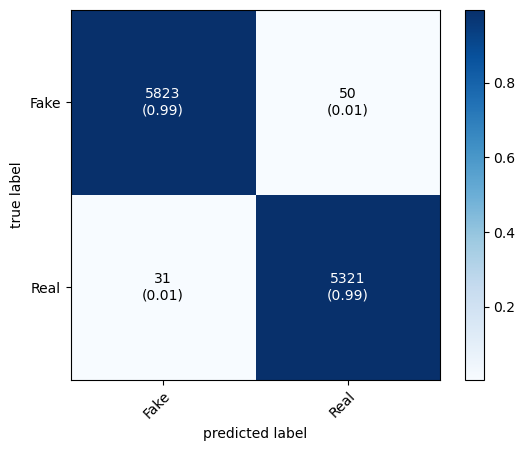

In [40]:
y_pred = pa_clf.predict(tfidf_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
 show_normed=True, colorbar=True,
 class_names=['Fake', 'Real'])
accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')
print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

In [41]:
#Further exploration

In [42]:
# Dimensionality and density of features
print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 108027
Density (i.e., fraction of non-zero elements): 0.511


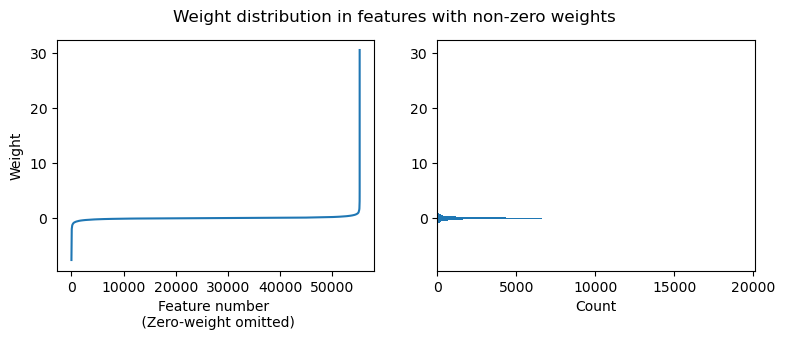

In [43]:
# Sort non-zero weights
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
# Plot
fig, axs = plt.subplots(1,2, figsize=(9,3))
sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')
axs[1].hist(weights_nonzero_sorted,
 orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')
fig.suptitle('Weight distribution in features with non-zero weights')
plt.show()


In [44]:
#Extracting "Indicator" Tokens

In [91]:
# Sort features by their associated weights
tokens = my_tfidf.get_feature_names_out()
tokens_nonzero = np.array(tokens)[pa_clf.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]
num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])
fake_indicator = pd.DataFrame({
 'Token': fake_indicator_tokens,
 'Weight': weights_nonzero_sorted[:num_tokens]
})
real_indicator = pd.DataFrame({
 'Token': real_indicator_tokens,
 'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})
print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)
print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-7.619189
1,featured,-7.469582
2,image,-7.233118
3,gop,-6.003824
4,just,-5.654481
5,getty,-5.090085
6,com,-4.829277
7,hillary,-4.098337
8,sen,-3.948123
9,rep,-3.941254




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,30.589775
1,nov,4.857763
2,washington,4.649589
3,republican,4.488649
4,wednesday,4.204168
5,tuesday,4.022558
6,thursday,3.683755
7,friday,3.075548
8,comment,3.038689
9,statement,3.014211


In [46]:
fake_contain_fake = fake.text.loc[[np.any([token in body for token in fake_indicator.Token])
 for body in fake.text.str.lower()]]
real_contain_real = real.text.loc[[np.any([token in body for token in real_indicator.Token])
 for body in real.text.str.lower()]]
print('Articles that contained any of the matching indicator tokens:\n')
print('FAKE: {} out of {} ({:.2f}%)'
 .format(len(fake_contain_fake), len(fake), len(fake_contain_fake)/len(fake) * 100))
print(fake_contain_fake)
print('\nREAL: {} out of {} ({:.2f}%)'
 .format(len(real_contain_real), len(real), len(real_contain_real)/len(real) * 100))
print(real_contain_real)

Articles that contained any of the matching indicator tokens:

FAKE: 21913 out of 23481 (93.32%)
0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 21913, dtype: object

REAL: 21409 out of 21417 (99.96%)
0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3

In [47]:
#Generalizability
def FakeNewsDetection(X, y):
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
 
 # vectorizer
 my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
 tfidf_train = my_tfidf.fit_transform(X_train)
 tfidf_test = my_tfidf.transform(X_test)
 
 # model
 my_pac = PassiveAggressiveClassifier(max_iter=50)
 my_pac.fit(tfidf_train, y_train)
 y_pred = my_pac.predict(tfidf_test)
 
 # metrics
 conf_mat = confusion_matrix(y_test, y_pred)
 plot_confusion_matrix(conf_mat,
 show_normed=True, colorbar=True,
 class_names=['Fake', 'Real'])
 
 accscore = accuracy_score(y_test, y_pred)
 f1score = f1_score(y_test,y_pred,pos_label='real')
 print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
 print('The F1 score is {:.3f}.\n'.format(f1score))
 
 # Sort non-zero weights
 weights_nonzero = my_pac.coef_[my_pac.coef_!=0]
 feature_sorter_nonzero = np.argsort(weights_nonzero)
 weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
 
 # Sort features by their associated weights
 tokens = my_tfidf.get_feature_names_out()
 tokens_nonzero = np.array(tokens)[my_pac.coef_[0]!=0]
 tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]
 num_tokens = 10
 fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
 real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])
 fake_indicator = pd.DataFrame({
 'Token': fake_indicator_tokens,
 'Weight': weights_nonzero_sorted[:num_tokens]
 })
 real_indicator = pd.DataFrame({
 'Token': real_indicator_tokens,
 'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
 })
 print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
 display(fake_indicator)
 print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
 display(real_indicator)

In [48]:
# Generate a copy of the "real news" dataset and remove headings f
real_copy = real.copy()
for i,body in real.text.items():
    if '(reuters)' in body.lower():
        idx = body.lower().index('(reuters)') + len('(reuters) - ')
        real_copy.text.iloc[i] = body[idx:]
real_copy.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real


The accuracy of prediction is 98.62%.

The F1 score is 0.985.

The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-10.588480
1,featured,-9.868193
2,image,-9.297717
3,gop,-8.359532
4,getty,-7.416018
5,com,-6.816157
6,sen,-6.275466
7,rep,-6.160517
8,just,-5.990772
9,watch,-5.782323




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,wednesday,7.486647
1,thursday,7.350122
2,tuesday,7.094145
3,friday,6.593630
4,nov,6.520451
5,monday,5.688662
6,reuters,5.667383
7,republican,4.993207
8,statement,4.471087
9,representatives,4.274833


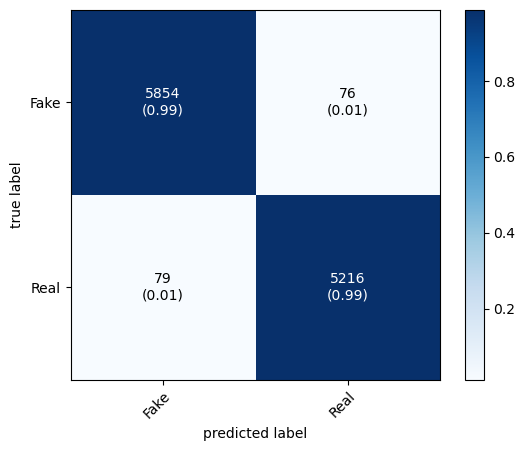

In [49]:
# Create new data, and run the algorithm
data2 = pd.concat([fake, real_copy], axis=0)
data2 = data2.sample(frac=1).reset_index(drop=True)
data2.drop('subject', axis=1)
FakeNewsDetection(data2['text'], data2['label'])

In [80]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenize and pad the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=500)


In [53]:
# Tokenize and pad the testing data
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=500)



In [81]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(len(word_index)+1, 128, input_length=500))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [72]:
# create tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)


In [73]:
# convert text to sequences of numbers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [74]:
# pad sequences to make them of equal length
X_train_seq = pad_sequences(X_train_seq, maxlen=200)
X_test_seq = pad_sequences(X_test_seq, maxlen=200)

In [75]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# define model architecture
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

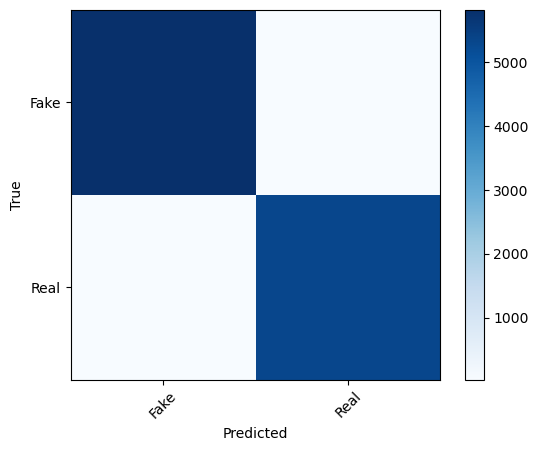

In [78]:
# Evaluate the model
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(['Fake', 'Real']))
plt.xticks(tick_marks, ['Fake', 'Real'], rotation=45)
plt.yticks(tick_marks, ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [92]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

0.9927839643652562